In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def plotImage(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [82]:
def plotAllImages(images):
    columns = 2
    rows = 1
    i = 1
    fig=plt.figure(figsize=(10, 10))

    for key in images.keys():
        fig.add_subplot(rows, columns, i)
        plt.xlabel(str(key))
        plt.imshow(images[key], cmap = 'gray', vmin=0, vmax=255)
        i = i+1

    plt.subplots_adjust(bottom=0.40, top=0.75)
    plt.show()

### Filtros originais

In [4]:
filter_h3 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter_h3 

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [5]:
filter_h4 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
filter_h4

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

### Combinação dos filtros

In [44]:
image = cv.imread('input_images/seagull.png',0)
result = {}

In [49]:
type(image[0,0])

numpy.uint8

#### Abordagem 1 a: Combinar filtros, sem normalização

In [15]:
new_filter = np.sqrt(np.power(filter_h3, 2) + np.power(filter_h4,2))
new_filter

array([[1.41421356, 2.        , 1.41421356],
       [2.        , 0.        , 2.        ],
       [1.41421356, 2.        , 1.41421356]])

In [50]:
type(new_filter[0,0])

numpy.float64

In [16]:
result['conv_image'] = signal.convolve2d(image,new_filter, boundary='fill', mode='same')
result['corr_image'] = cv.filter2D(image,-1,new_filter,borderType=cv.BORDER_CONSTANT)

In [52]:
type(result['conv_image'][0,0]), type(result['conv_image'][0,0])

(numpy.float64, numpy.float64)

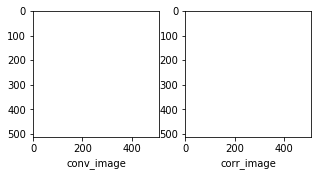

In [23]:
plotAllImages(result)

#### Abordagem 1 b: Combinar filtros, normalizando imagem de entrada

In [25]:
norm_image = image/255
norm_image[:2]

array([[0.43921569, 0.43921569, 0.43921569, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.09803922, 0.1254902 ,
        0.1254902 ]])

In [54]:
type(norm_image[0,0])

numpy.float64

In [27]:
result['conv_image'] = signal.convolve2d(norm_image,new_filter, boundary='fill', mode='same')
result['corr_image'] = cv.filter2D(norm_image,-1,new_filter,borderType=cv.BORDER_CONSTANT)

In [55]:
type(result['conv_image'][0,0]), type(result['conv_image'][0,0])

(numpy.float64, numpy.float64)

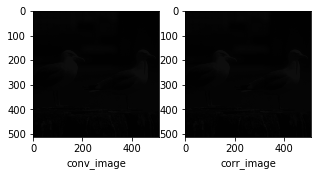

In [28]:
plotAllImages(result)

#### Abordagem 1 c: Combinar filtros, normalizando imagem resultante

In [41]:
result['conv_image'] = signal.convolve2d(image,new_filter, boundary='fill', mode='same')
result['corr_image'] = cv.filter2D(image,-1,new_filter,borderType=cv.BORDER_CONSTANT)

In [42]:
result['conv_image'] = (result['conv_image']/np.max(result['conv_image'])) * 255
result['corr_image'] = (result['corr_image']/np.max(result['corr_image'])) * 255

In [56]:
type(result['conv_image'][0,0]), type(result['conv_image'][0,0])

(numpy.float64, numpy.float64)

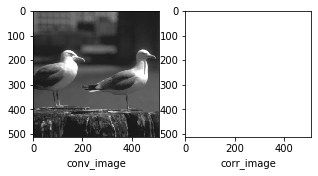

In [43]:
plotAllImages(result)

#### Abordagem 1 d: Combinar filtros, normalizando as imagens de entrada e saída

In [45]:
norm_image = image/255
norm_image[:2]

array([[0.43921569, 0.43921569, 0.43921569, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.09803922, 0.1254902 ,
        0.1254902 ]])

In [46]:
result['conv_image'] = signal.convolve2d(norm_image,new_filter, boundary='fill', mode='same')
result['corr_image'] = cv.filter2D(norm_image,-1,new_filter,borderType=cv.BORDER_CONSTANT)

In [47]:
result['conv_image'] = (result['conv_image']/np.max(result['conv_image'])) * 255
result['corr_image'] = (result['corr_image']/np.max(result['corr_image'])) * 255

In [57]:
type(result['conv_image'][0,0]), type(result['conv_image'][0,0])

(numpy.float64, numpy.float64)

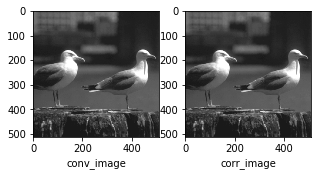

In [48]:
plotAllImages(result)

#### Abordagem 2 a: Combinar imagens filtradas, sem normalização

In [127]:
result = {}

In [101]:
conv_filtered_h3 = signal.convolve2d(image,filter_h3, boundary='fill', mode='same')
corr_filtered_h3 = cv.filter2D(image,-1,filter_h3, borderType=cv.BORDER_CONSTANT)

conv_filtered_h4 = signal.convolve2d(image, filter_h4, boundary='fill', mode='same')
corr_filtered_h4 = cv.filter2D(image,-1,filter_h4, borderType=cv.BORDER_CONSTANT)

In [89]:
result['conv_image2'] = np.sqrt(np.power(conv_filtered_h3,2) + np.power(conv_filtered_h4,2))
result['corr_image2'] = np.sqrt(np.power(corr_filtered_h3.astype(np.float),2) + np.power(corr_filtered_h4.astype(np.float),2))

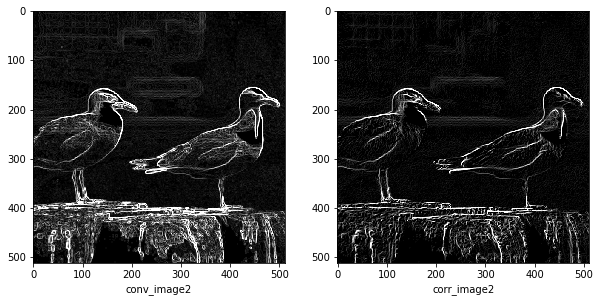

In [90]:
plotAllImages(result)

#### Abordagem 2 b: Combinar imagens filtradas, normalizando a entrada

In [92]:
norm_image = image/255
norm_image[:2]

array([[0.43921569, 0.43921569, 0.43921569, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.09803922, 0.1254902 ,
        0.1254902 ]])

In [120]:
conv_filtered_h3 = signal.convolve2d(norm_image,filter_h3, boundary='fill', mode='same')
corr_filtered_h3 = cv.filter2D(norm_image,-1,filter_h3, borderType=cv.BORDER_CONSTANT)

conv_filtered_h4 = signal.convolve2d(norm_image, filter_h4, boundary='fill', mode='same')
corr_filtered_h4 = cv.filter2D(norm_image,-1,filter_h4, borderType=cv.BORDER_CONSTANT)

In [121]:
result['conv_image2'] = np.sqrt(np.power(conv_filtered_h3,2) + np.power(conv_filtered_h4,2))
result['corr_image2'] = np.sqrt(np.power(corr_filtered_h3.astype(np.float),2) + np.power(corr_filtered_h4.astype(np.float),2))

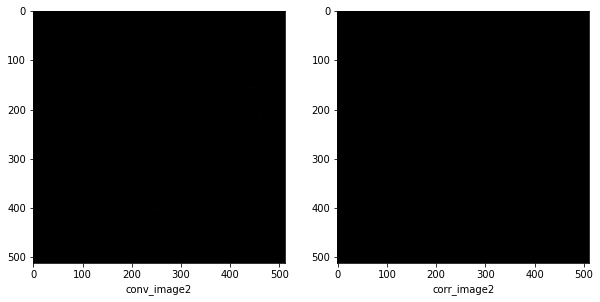

In [122]:
plotAllImages(result)

#### Abordagem 2 c: Combinar imagens filtradas, normalizando a imagem resultante

In [113]:
conv_filtered_h3 = signal.convolve2d(image,filter_h3, boundary='fill', mode='same')
corr_filtered_h3 = cv.filter2D(image,-1,filter_h3, borderType=cv.BORDER_CONSTANT)

conv_filtered_h4 = signal.convolve2d(image, filter_h4, boundary='fill', mode='same')
corr_filtered_h4 = cv.filter2D(image,-1,filter_h4, borderType=cv.BORDER_CONSTANT)

In [114]:
result['conv_image2'] = np.sqrt(np.power(conv_filtered_h3,2) + np.power(conv_filtered_h4,2))
result['conv_image2'] = (result['conv_image2']/np.max(result['conv_image2']))*255

result['corr_image2'] = np.sqrt(np.power(corr_filtered_h3.astype(np.float),2) + np.power(corr_filtered_h4.astype(np.float),2))
result['corr_image2'] = (result['corr_image2']/np.max(result['corr_image2']))*255

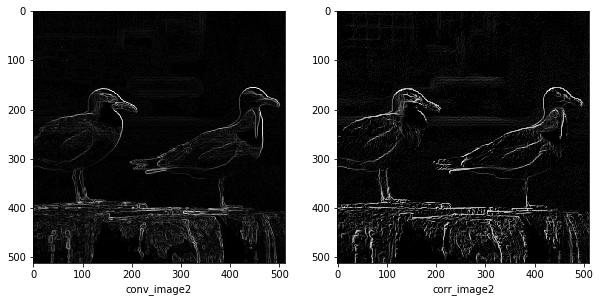

In [115]:
plotAllImages(result)

#### Abordagem 2 d: Combinar imagens filtradas, normalizando a entrada e a saída

In [128]:
norm_image = image/255
norm_image[:2]

array([[0.43921569, 0.43921569, 0.43921569, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.09803922, 0.1254902 ,
        0.1254902 ]])

In [129]:
conv_filtered_h3 = signal.convolve2d(norm_image,filter_h3, boundary='fill', mode='same')
corr_filtered_h3 = cv.filter2D(norm_image,-1,filter_h3, borderType=cv.BORDER_CONSTANT)

conv_filtered_h4 = signal.convolve2d(norm_image, filter_h4, boundary='fill', mode='same')
corr_filtered_h4 = cv.filter2D(norm_image,-1,filter_h4, borderType=cv.BORDER_CONSTANT)

In [130]:
result['conv_image2'] = np.sqrt(np.power(conv_filtered_h3,2) + np.power(conv_filtered_h4,2))
result['conv_image2'] = (result['conv_image2']/np.max(result['conv_image2']))*255

result['corr_image2'] = np.sqrt(np.power(corr_filtered_h3.astype(np.float),2) + np.power(corr_filtered_h4.astype(np.float),2))
result['corr_image2'] = (result['corr_image2']/np.max(result['corr_image2']))*255

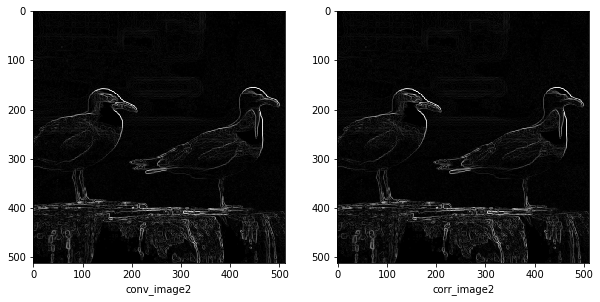

In [131]:
plotAllImages(result)

In [132]:
np.equal(result['conv_image2'], result['corr_image2'])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ..., False, False,  True],
       ...,
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])